In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [9]:
df.loc[df['Chance of Admit '] >= 0.80 , 'Chance of Admit '] = 1
df.loc[df['Chance of Admit '] < 0.80 , 'Chance of Admit '] = 0

In [13]:
x = df[['GRE Score','TOEFL Score','University Rating','SOP',
        'LOR ','CGPA','Research']]
y = df['Chance of Admit ']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [16]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [17]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


In [18]:
y_train

,Chance of Admit
93,0.0
23,1.0
299,0.0
13,0.0
90,0.0
...,...
255,0.0
72,1.0
396,1.0
235,1.0


In [19]:
y_test

,Chance of Admit
398,0.0
125,0.0
328,1.0
339,1.0
172,1.0
...,...
347,0.0
41,0.0
180,0.0
132,0.0


In [20]:
from sklearn.tree import DecisionTreeClassifier


In [22]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
matrix = confusion_matrix(y_test, y_pred)

In [27]:
matrix

array([[49,  5],
       [ 3, 23]])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
acc

0.9

In [30]:
prec

0.8214285714285714

In [32]:
rec

0.8846153846153846

In [33]:
f1

0.8518518518518519

In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.94      0.91      0.92        54\n         1.0       0.82      0.88      0.85        26\n\n    accuracy                           0.90        80\n   macro avg       0.88      0.90      0.89        80\nweighted avg       0.90      0.90      0.90        80\n'

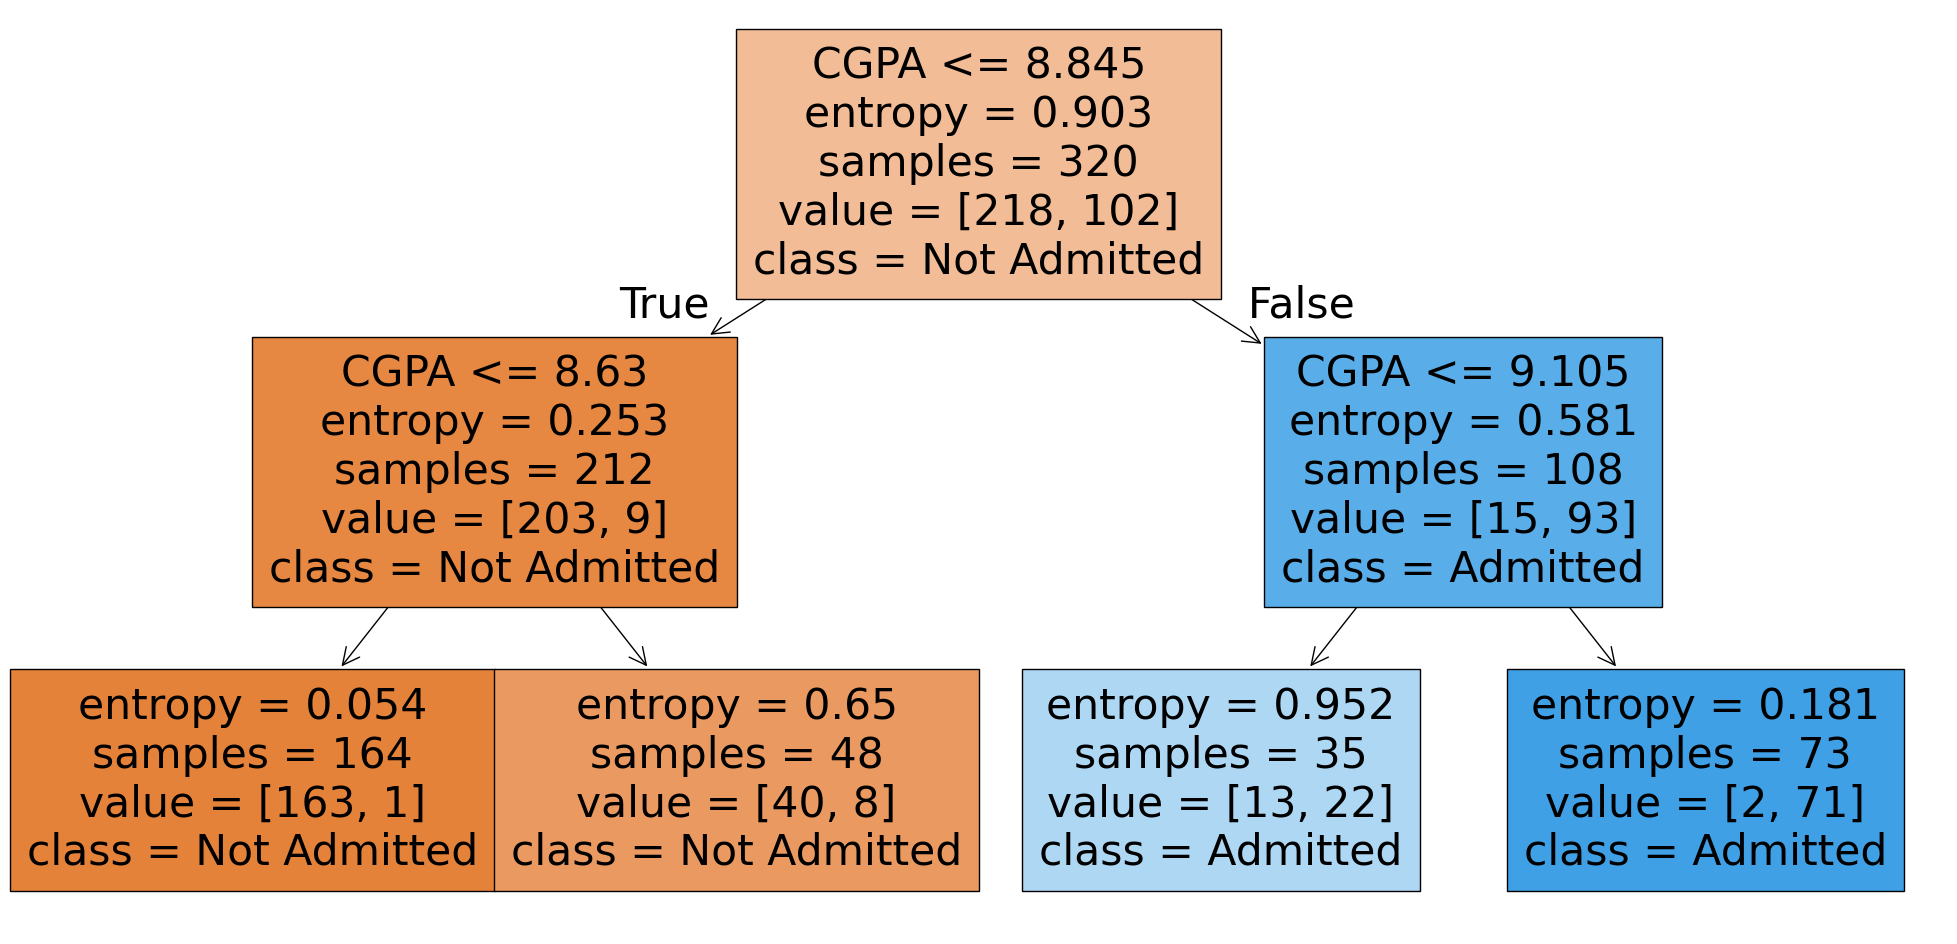

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Not Admitted','Admitted'],
    filled=True
)
plt.show()